# Retrieving prod models

In [4]:
from mlflow.tracking.client import MlflowClient
import mlflow.pyfunc
import mlflow

model_name = "BestModel"
model_stage = "Production"

mlflow.tracking.set_tracking_uri("http://127.0.0.1:5000")

client = MlflowClient()
model_version = client.get_latest_versions(model_name, stages=[model_stage])
model_version

[<ModelVersion: creation_timestamp=1592199431872, current_stage='Production', description='', last_updated_timestamp=1592199535423, name='BestModel', run_id='318b8c180a1e48b9a2a3fdd7a0214610', source='file:///home/samreay/mlruns/1/318b8c180a1e48b9a2a3fdd7a0214610/artifacts/model', status='READY', status_message='', user_id='', version='1'>]

In [5]:
model_version[0].source

'file:///home/samreay/mlruns/1/318b8c180a1e48b9a2a3fdd7a0214610/artifacts/model'

In [7]:
model = mlflow.pyfunc.load_model(model_version[0].source)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=64, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

input_data = pd.read_csv("germany.csv", parse_dates=[0], index_col=0)["2015-01"]
X_test = input_data[["windspeed", "temperature", "rad_horizontal", "rad_diffuse"]]
y_test = input_data[["solar_GW", "wind_GW"]]
x = X_test.index

In [10]:
# This is the magic! We have a generic model from mlflow models that we can predict on. 
# We dont know or care about whether it was linear regression, RF, other, we just call predict
y_predict = model.predict(X_test)

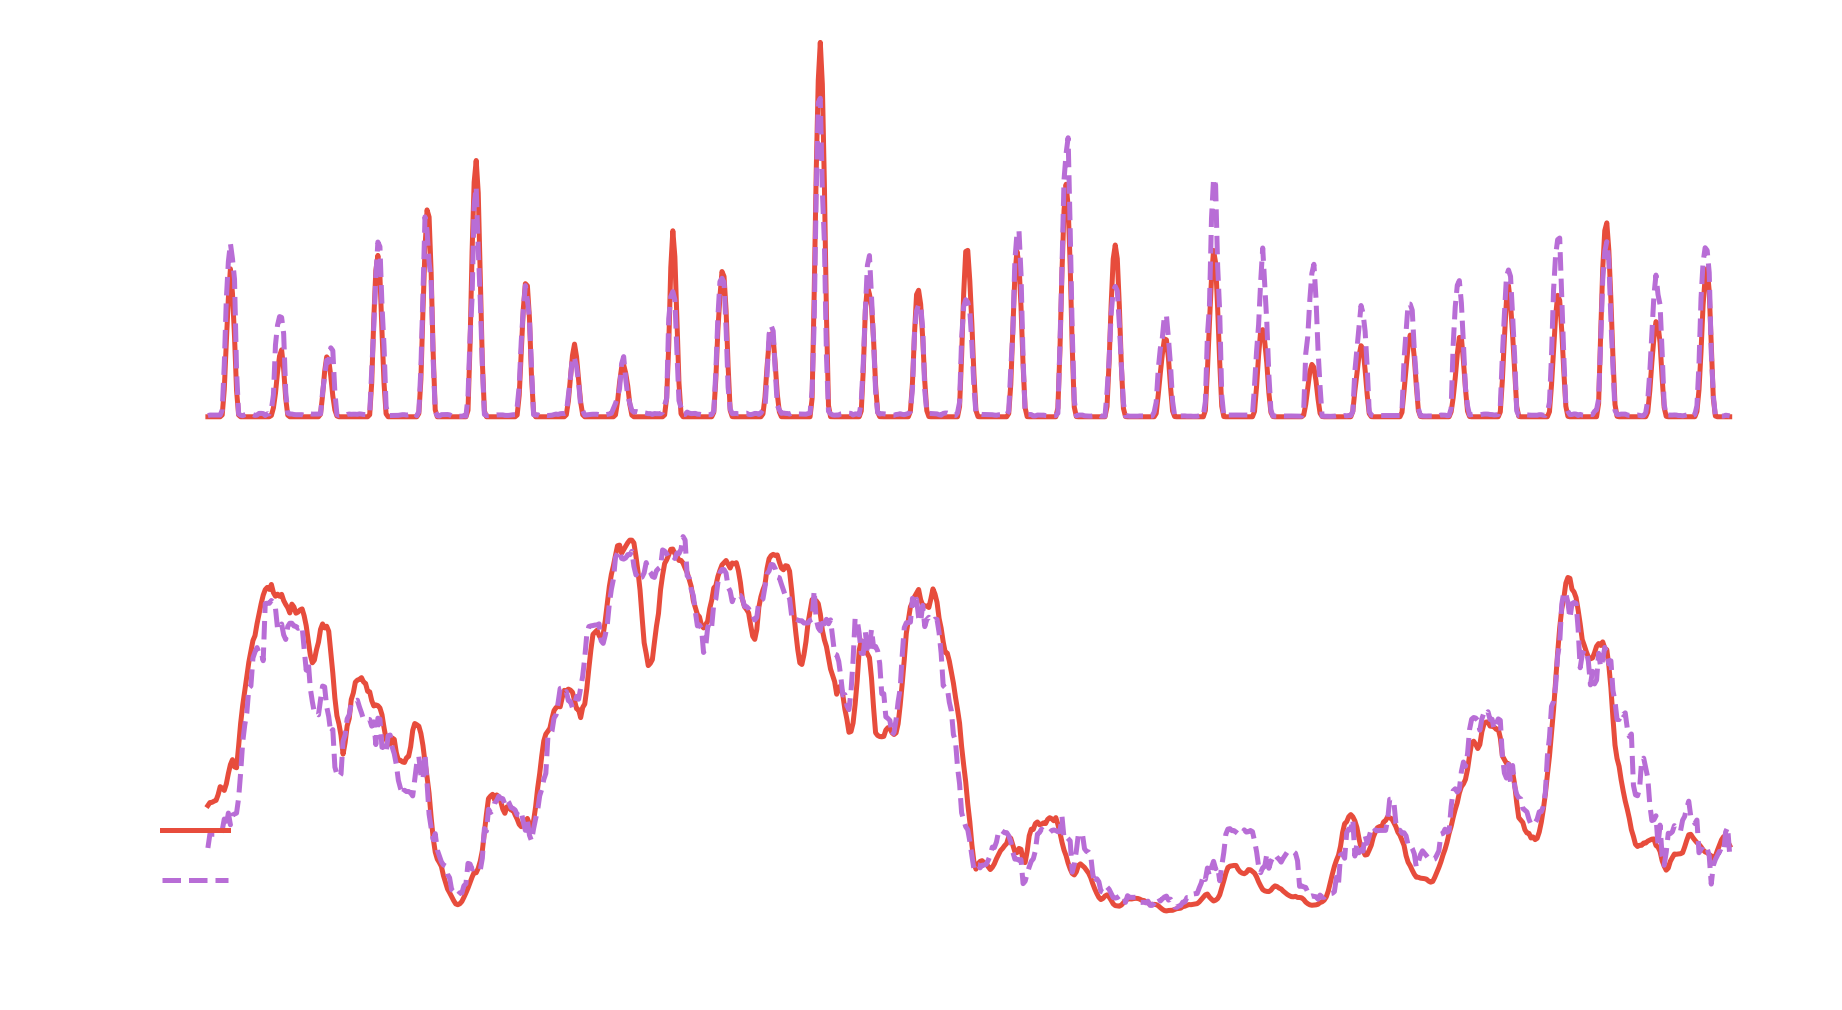

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, figsize=(9, 5), sharex=True)
axes[0].plot(x, y_test["solar_GW"], label="Actual")
axes[0].plot(x, y_predict[:, 0], label="Predicted")
axes[1].plot(x, y_test["wind_GW"], label="Actual")
axes[1].plot(x, y_predict[:, 1], label="Predicted")
axes[1].legend(), axes[0].set_ylabel("Solar GW"), axes[1].set_ylabel("Wind GW");